In [406]:
#importing required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.metrics import r2_score
from pylab import rcParams
%matplotlib inline

In [407]:
#loading the dataset
df = pd.read_csv('D:\\Simpli learn\\Project\\1577429980_walmart_store_sales\\Walmart_Store_sales.csv')
#df['Weekly_Sales'] = pd.to_numeric(df["Weekly_Sales"])
df['Weekly_Sales'] = df['Weekly_Sales'].astype('int') 
# df['Weekly_Sales'].apply(lambda x: '%.5f' % x, axis=1)
# df['Weekly_Sales'] = df['Weekly_Sales'].map(int) 
#df = df[df['Store'] == 1]

In [408]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806,0,46.50,2.625,211.350143,8.106


In [409]:
#Extracting features from Date  
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df["Year"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.year
df["Day"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.day
df["Month"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.month
# df.dropna(inplace=True)

In [410]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month
0,1,2010-02-05,1643690,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-02-12,1641957,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,2010,19,2
3,1,2010-02-26,1409727,0,46.63,2.561,211.319643,8.106,2010,26,2
4,1,2010-03-05,1554806,0,46.50,2.625,211.350143,8.106,2010,5,3


Store with Maximum Sales

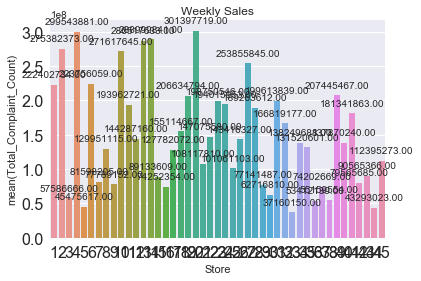

In [411]:
Sales = df.groupby('Store').Weekly_Sales.agg(['sum']).reset_index().rename(columns={'sum':'Total_Complaint_Count'})
Sales
#x=df['Store']
plt.title("Weekly Sales")
plt.xticks(fontsize = 16)#Store with Maximum Sales
#Store 20 has the maximum sales
#df.groupby('Store').sum().Weekly_Sales.plot(Store, Weekly_Sales)
df.groupby('Store').sum().Weekly_Sales.idxmax()
plt.yticks(fontsize = 16)
rcParams['figure.figsize']=(30, 30)
barplot = sns.barplot(x = Sales['Store'], y = Sales['Total_Complaint_Count'], data = Sales)

for x in barplot.patches:
    barplot.annotate(format(x.get_height(), '.2f'), (x.get_x() + x.get_width() / 2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


In [412]:
#Store with Maximum Sales
#Store 20 has the maximum sales
#df.groupby('Store').sum().Weekly_Sales.plot(Store, Weekly_Sales)
df.groupby('Store').sum().Weekly_Sales.idxmax()

20

In [413]:
df.groupby('Store').agg(['std'])['Weekly_Sales'].reset_index().rename(columns={'std':'Standard Deviation'}).max()

Store                     45.000000
Standard Deviation    317569.927617
dtype: float64

In [414]:
#Quater field
Qtr_Temp = df['Date']
df['Qtr'] = Qtr_Temp.dt.quarter 
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month,Qtr
0,1,2010-02-05,1643690,0,42.31,2.572,211.096358,8.106,2010,5,2,1
1,1,2010-02-12,1641957,1,38.51,2.548,211.242170,8.106,2010,12,2,1
2,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,2010,19,2,1
3,1,2010-02-26,1409727,0,46.63,2.561,211.319643,8.106,2010,26,2,1
4,1,2010-03-05,1554806,0,46.50,2.625,211.350143,8.106,2010,5,3,1
5,1,2010-03-12,1439541,0,57.79,2.667,211.380643,8.106,2010,12,3,1
6,1,2010-03-19,1472515,0,54.58,2.720,211.215635,8.106,2010,19,3,1
7,1,2010-03-26,1404429,0,51.45,2.732,211.018042,8.106,2010,26,3,1
8,1,2010-04-02,1594968,0,62.27,2.719,210.820450,7.808,2010,2,4,2
9,1,2010-04-09,1545418,0,65.86,2.770,210.622857,7.808,2010,9,4,2


In [415]:
#semester field
conditions = [
    (df['Qtr'] == 1) | (df['Qtr'] == 2) ,
    (df['Qtr'] == 3) | (df['Qtr'] == 4) 
]
choices = [1, 2]
df['Semester'] = np.select(conditions, choices)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month,Qtr,Semester
0,1,2010-02-05,1643690,0,42.31,2.572,211.096358,8.106,2010,5,2,1,1
1,1,2010-02-12,1641957,1,38.51,2.548,211.242170,8.106,2010,12,2,1,1
2,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,2010,19,2,1,1
3,1,2010-02-26,1409727,0,46.63,2.561,211.319643,8.106,2010,26,2,1,1
4,1,2010-03-05,1554806,0,46.50,2.625,211.350143,8.106,2010,5,3,1,1
5,1,2010-03-12,1439541,0,57.79,2.667,211.380643,8.106,2010,12,3,1,1
6,1,2010-03-19,1472515,0,54.58,2.720,211.215635,8.106,2010,19,3,1,1
7,1,2010-03-26,1404429,0,51.45,2.732,211.018042,8.106,2010,26,3,1,1
8,1,2010-04-02,1594968,0,62.27,2.719,210.820450,7.808,2010,2,4,2,1
9,1,2010-04-09,1545418,0,65.86,2.770,210.622857,7.808,2010,9,4,2,1


In [416]:
Growth_Rate = df.groupby(['Store','Year','Qtr']).agg(['sum'])['Weekly_Sales'].reset_index().rename(columns={'sum':'Sales'})

Qtr_12 = Growth_Rate[(Growth_Rate['Year'] == 2012) & (Growth_Rate['Qtr'] == 3)] 
Qtr_11 = Growth_Rate[(Growth_Rate['Year'] == 2011) & (Growth_Rate['Qtr'] == 3)] 


Growth_Rate = pd.merge(Qtr_12,
                 Qtr_11,
                 on='Store', 
                 how='inner')
Growth_Rate.drop(['Qtr_x','Qtr_y'], axis=1, inplace=True)
Growth_Rate['Growth_Rate'] = (Growth_Rate['Sales_x'] - Growth_Rate['Sales_y'])/ Growth_Rate['Sales_x']
Growth_Rate.drop(['Year_x','Year_y', 'Sales_x', 'Sales_y'], axis=1, inplace=True)
Growth_Rate.sort_values('Growth_Rate', ascending=False).head()

,Store,Growth_Rate
43,44,0.047286
37,38,0.034395
17,18,0.028400
38,39,0.023889
2,3,0.010440


In [417]:
sales_impact = df[['Weekly_Sales','Holiday_Flag', 'Store', 'Year', 'Month']]
# Mean sales of Non-holiday periods
non_holiday = sales_impact[(sales_impact['Holiday_Flag']==0)].groupby(['Year', 'Month','Holiday_Flag']).agg(['mean'])['Weekly_Sales'].reset_index().rename(columns={'mean':'Average_Sales'})
# non_holiday
#Mean sales of holiday periods
holiday = sales_impact[(sales_impact['Holiday_Flag']==1)].groupby(['Year', 'Month','Holiday_Flag']).agg(['mean'])['Weekly_Sales'].reset_index().rename(columns={'mean':'Average_Sales'})
# holiday
Holiday_sales_impact= pd.merge(non_holiday,
                 holiday,
                 on=['Year', 'Month'], 
                 how='inner')

Holiday_sales_impact.drop(['Holiday_Flag_x','Holiday_Flag_y'], axis=1, inplace=True)

Holiday_sales_impact.rename(columns={'Average_Sales_x':'Average_Sales_Non-Holiday', 'Average_Sales_y':'Average_Sales_Holiday'} , inplace = True)

Holiday_sales_impact['Difference'] = Holiday_sales_impact["Average_Sales_Holiday"] - Holiday_sales_impact["Average_Sales_Non-Holiday"]
                                     
Holiday_sales_impact

,Year,Month,Average_Sales_Non-Holiday,Average_Sales_Holiday,Difference
0,2010,2,1051824,1074147,22323
1,2010,9,975062,1014097,39035
2,2010,11,1015054,1462688,447634
3,2010,12,1379599,898500,-481099
4,2011,2,1029593,1051914,22321
5,2011,9,967135,1039182,72047
6,2011,11,1063471,1479857,416386
7,2011,12,1344641,1023165,-321476
8,2012,2,1052252,1111319,59067
9,2012,9,980114,1074000,93886


From the above analysis we have compared Mean sales on non-holiday vs mean sales on holiday

Negative Sales Impact: 
Christmas Holidays on December month has negative impact on Sales

Positive Sales Impact: 
Super bowl Holidays on Febuary month 
Labour day Holidays on September month 
Thanks giving Holidays on November month


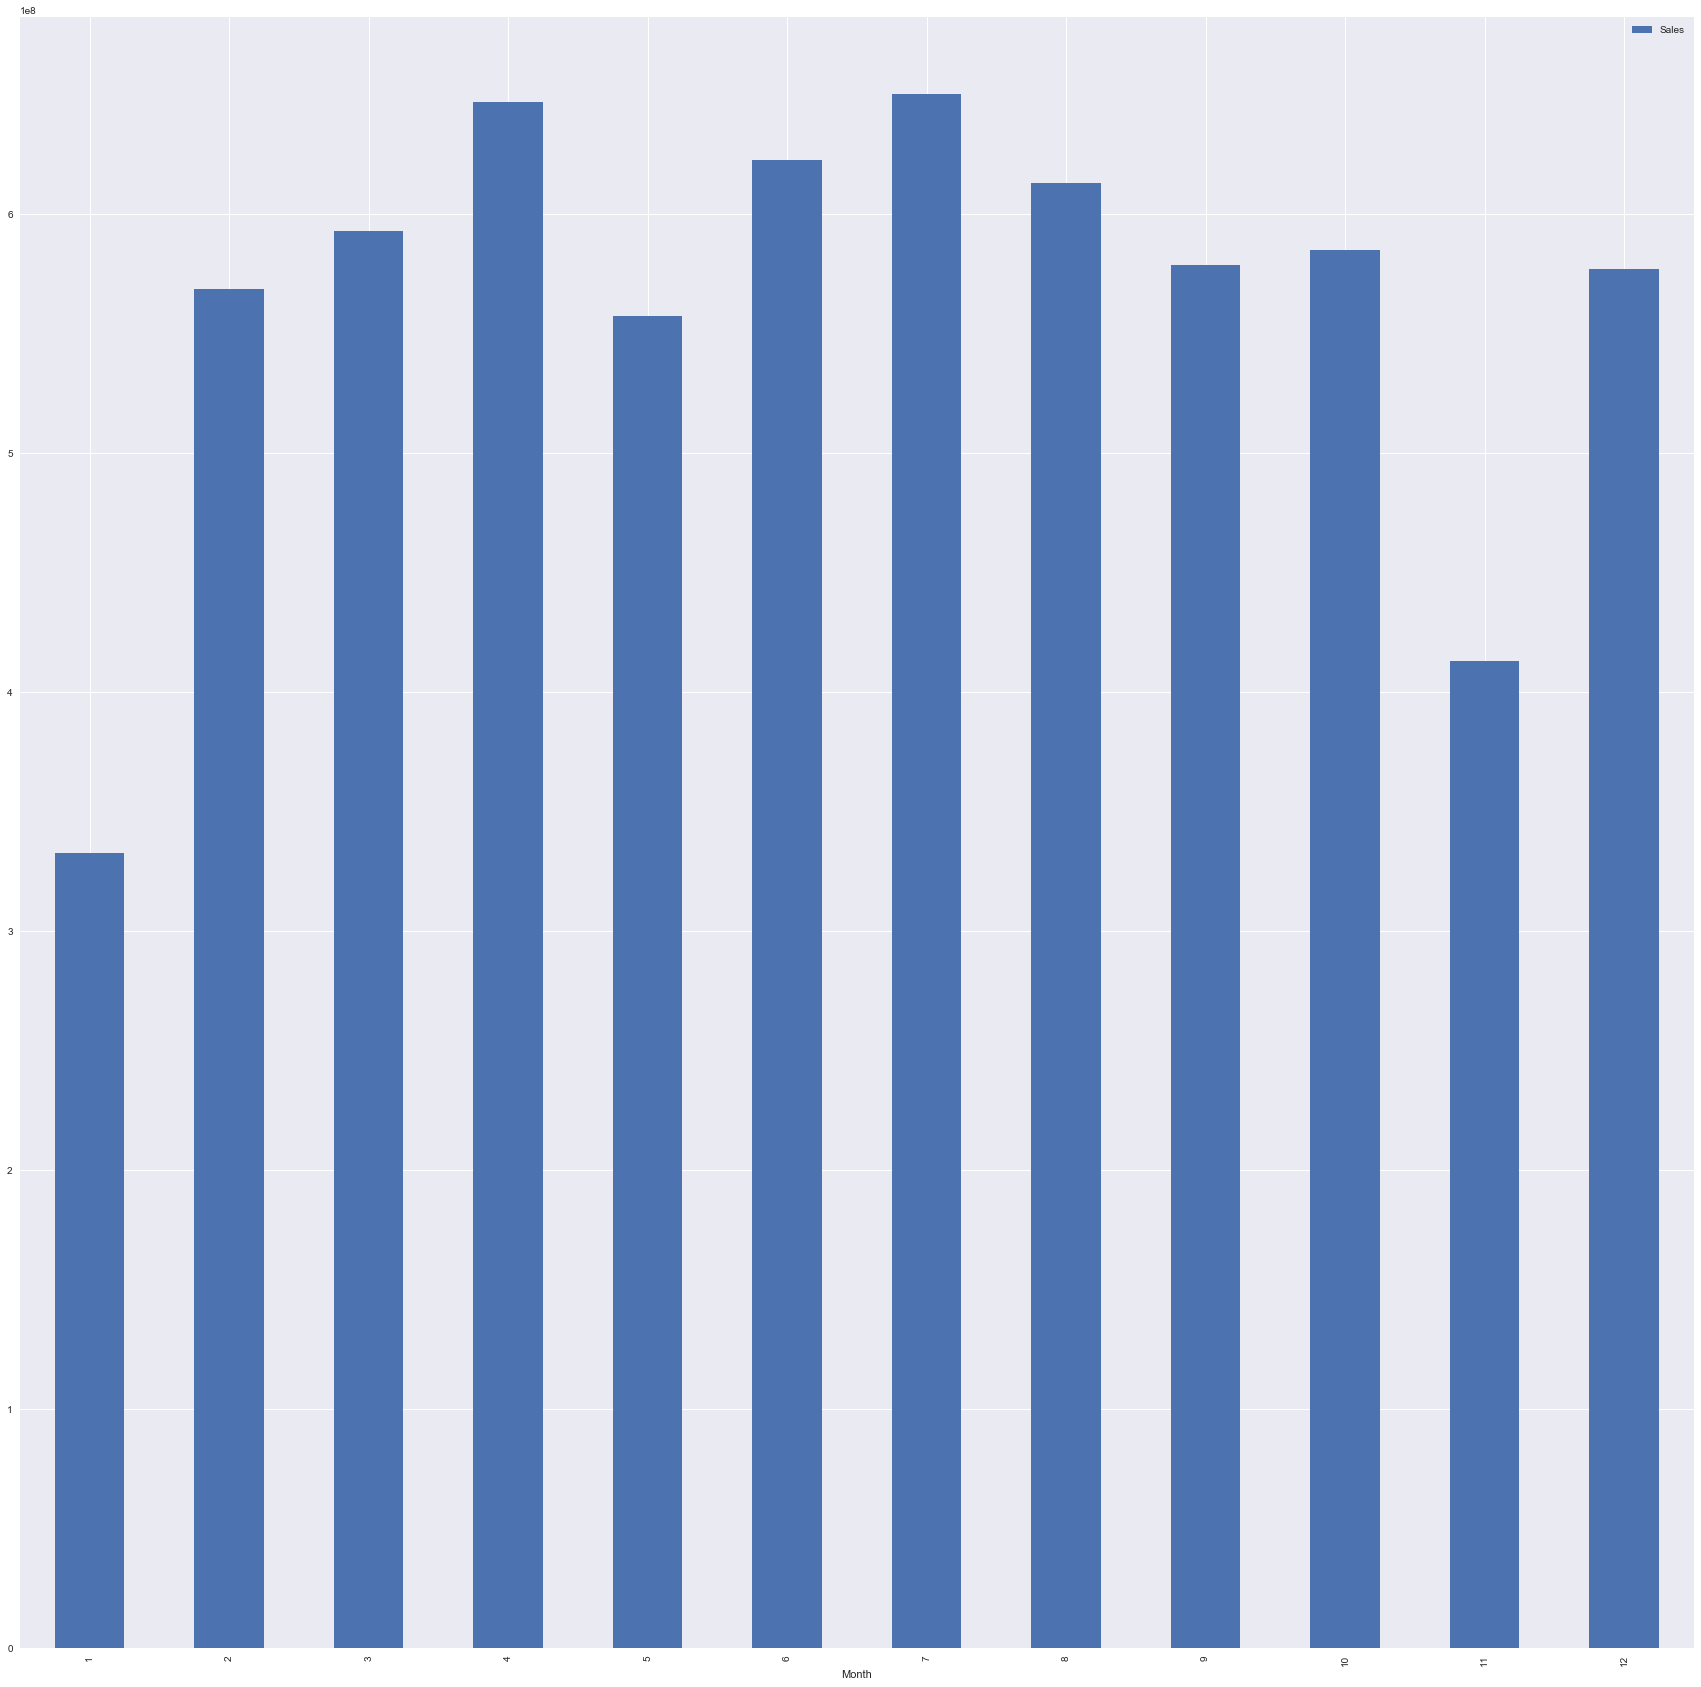

In [418]:
#Montly_Sales_Trend
Monthly_Sales = df.groupby(['Month']).agg(['sum'])['Weekly_Sales'].reset_index().rename(columns={'sum':'Sales'})
Monthly_Sales.head()
Monthly_Sales.plot.bar(x='Month', y='Sales')

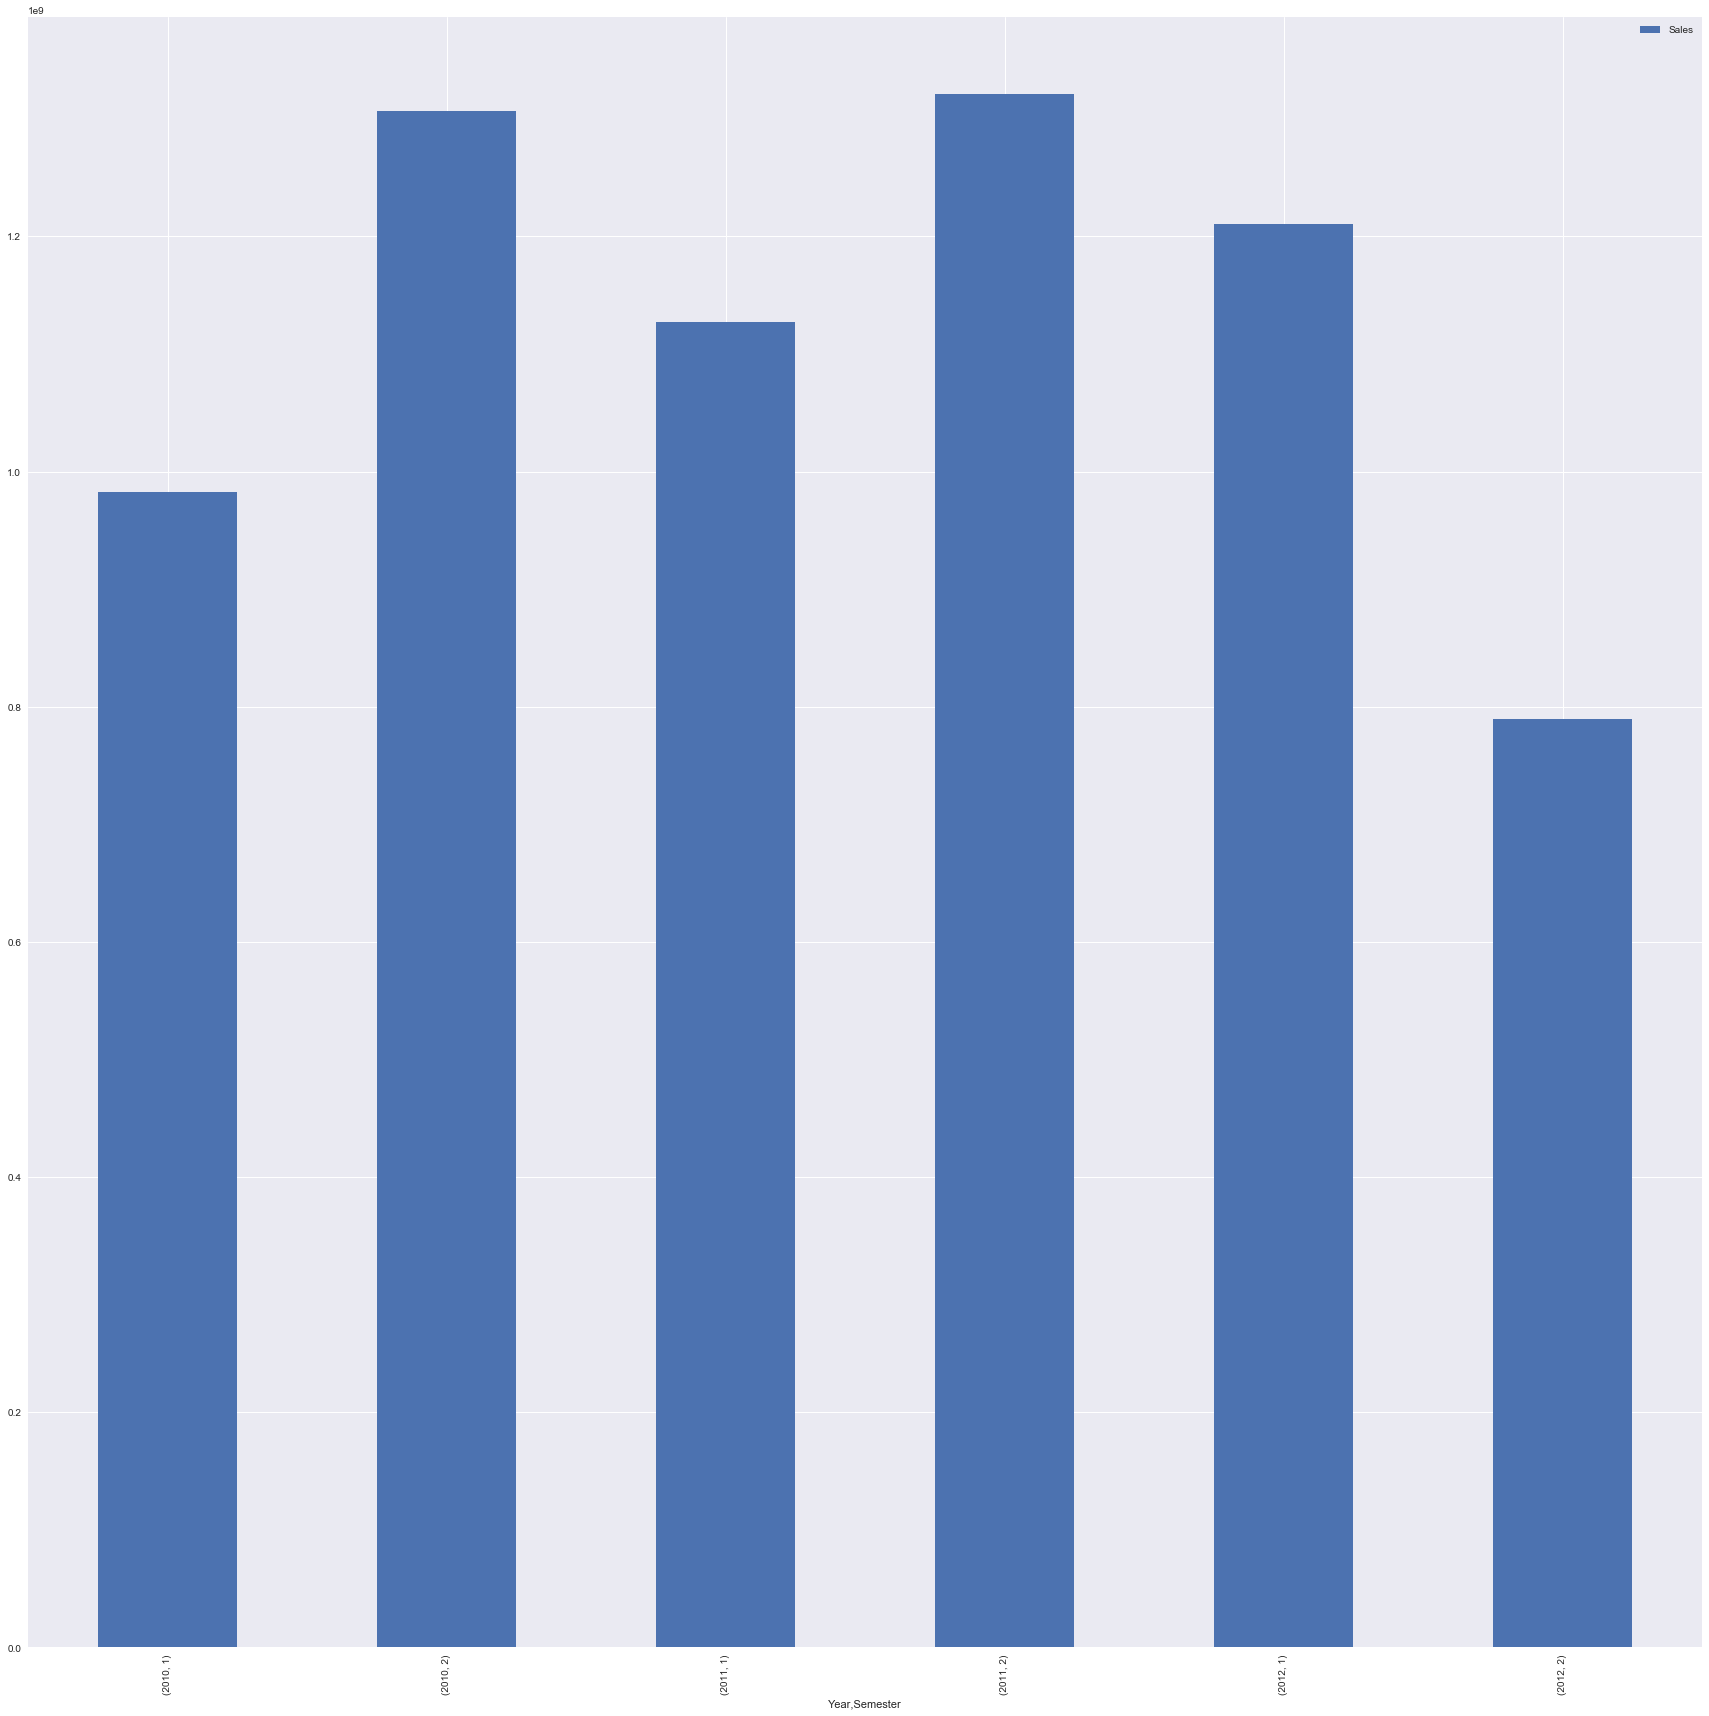

In [419]:
#Semester_Sales_Trend
Monthly_Sales = df.groupby(['Year','Semester']).agg(['sum'])['Weekly_Sales'].reset_index().rename(columns={'sum':'Sales'})
Monthly_Sales.head()
Monthly_Sales.plot.bar(x=['Year', 'Semester'], y='Sales')

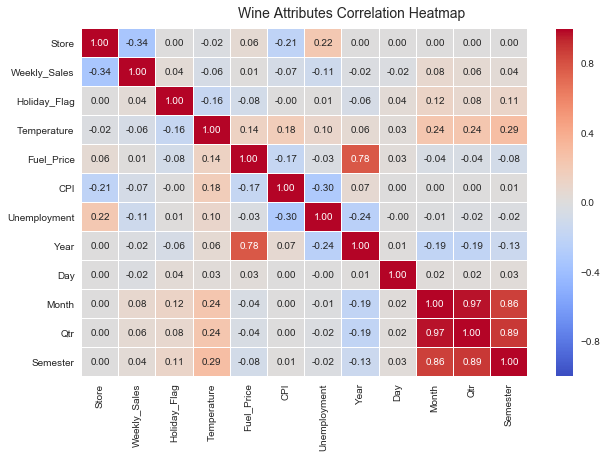

In [420]:

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

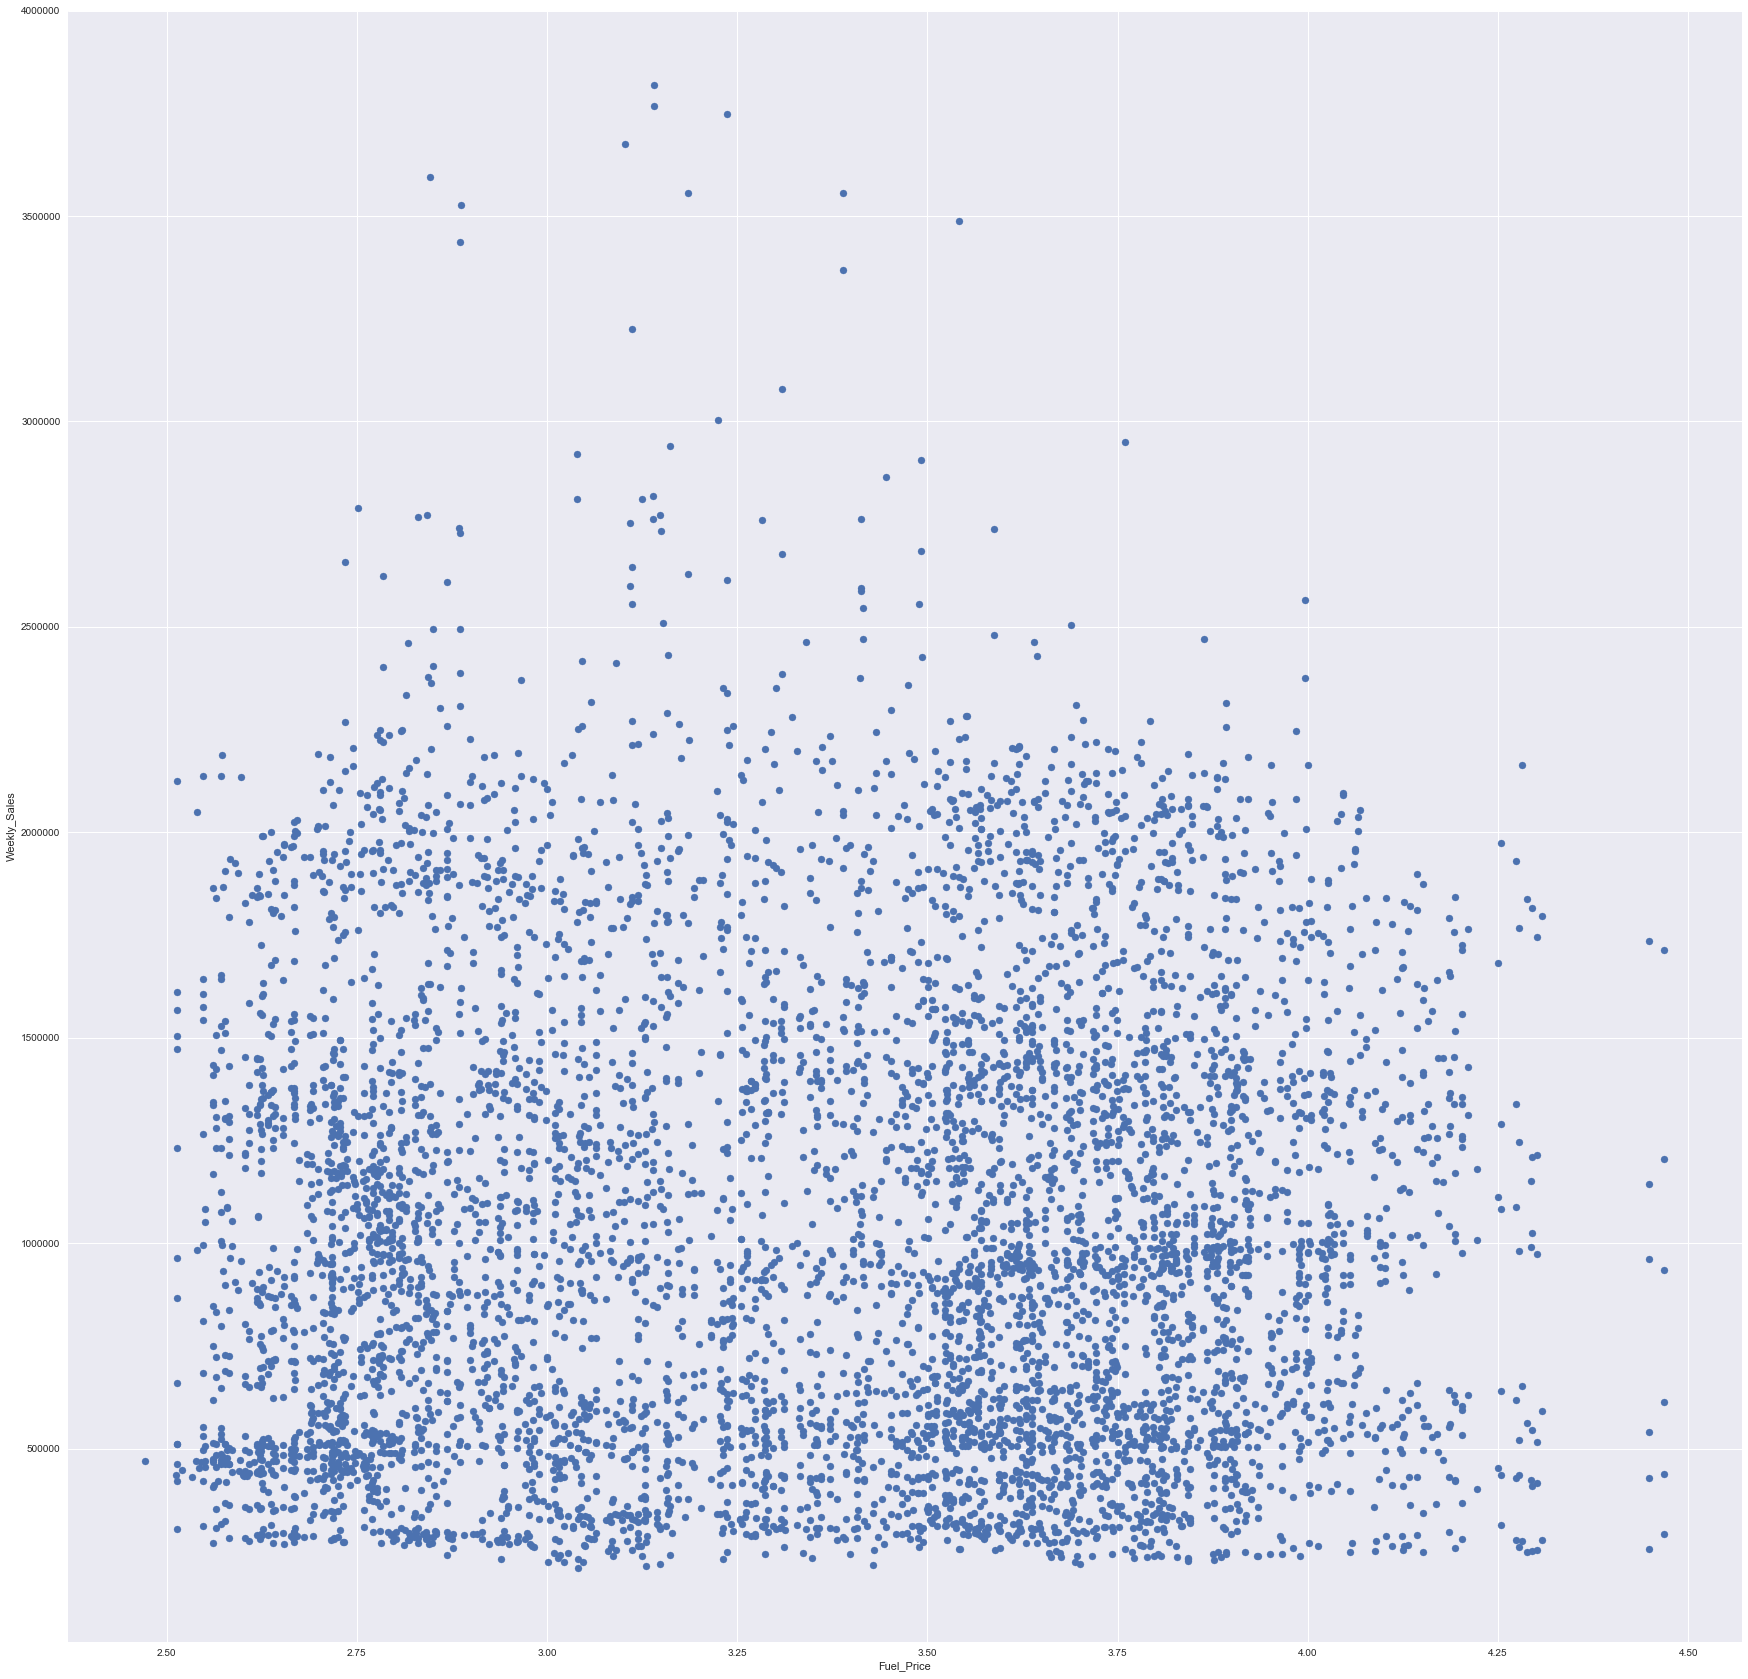

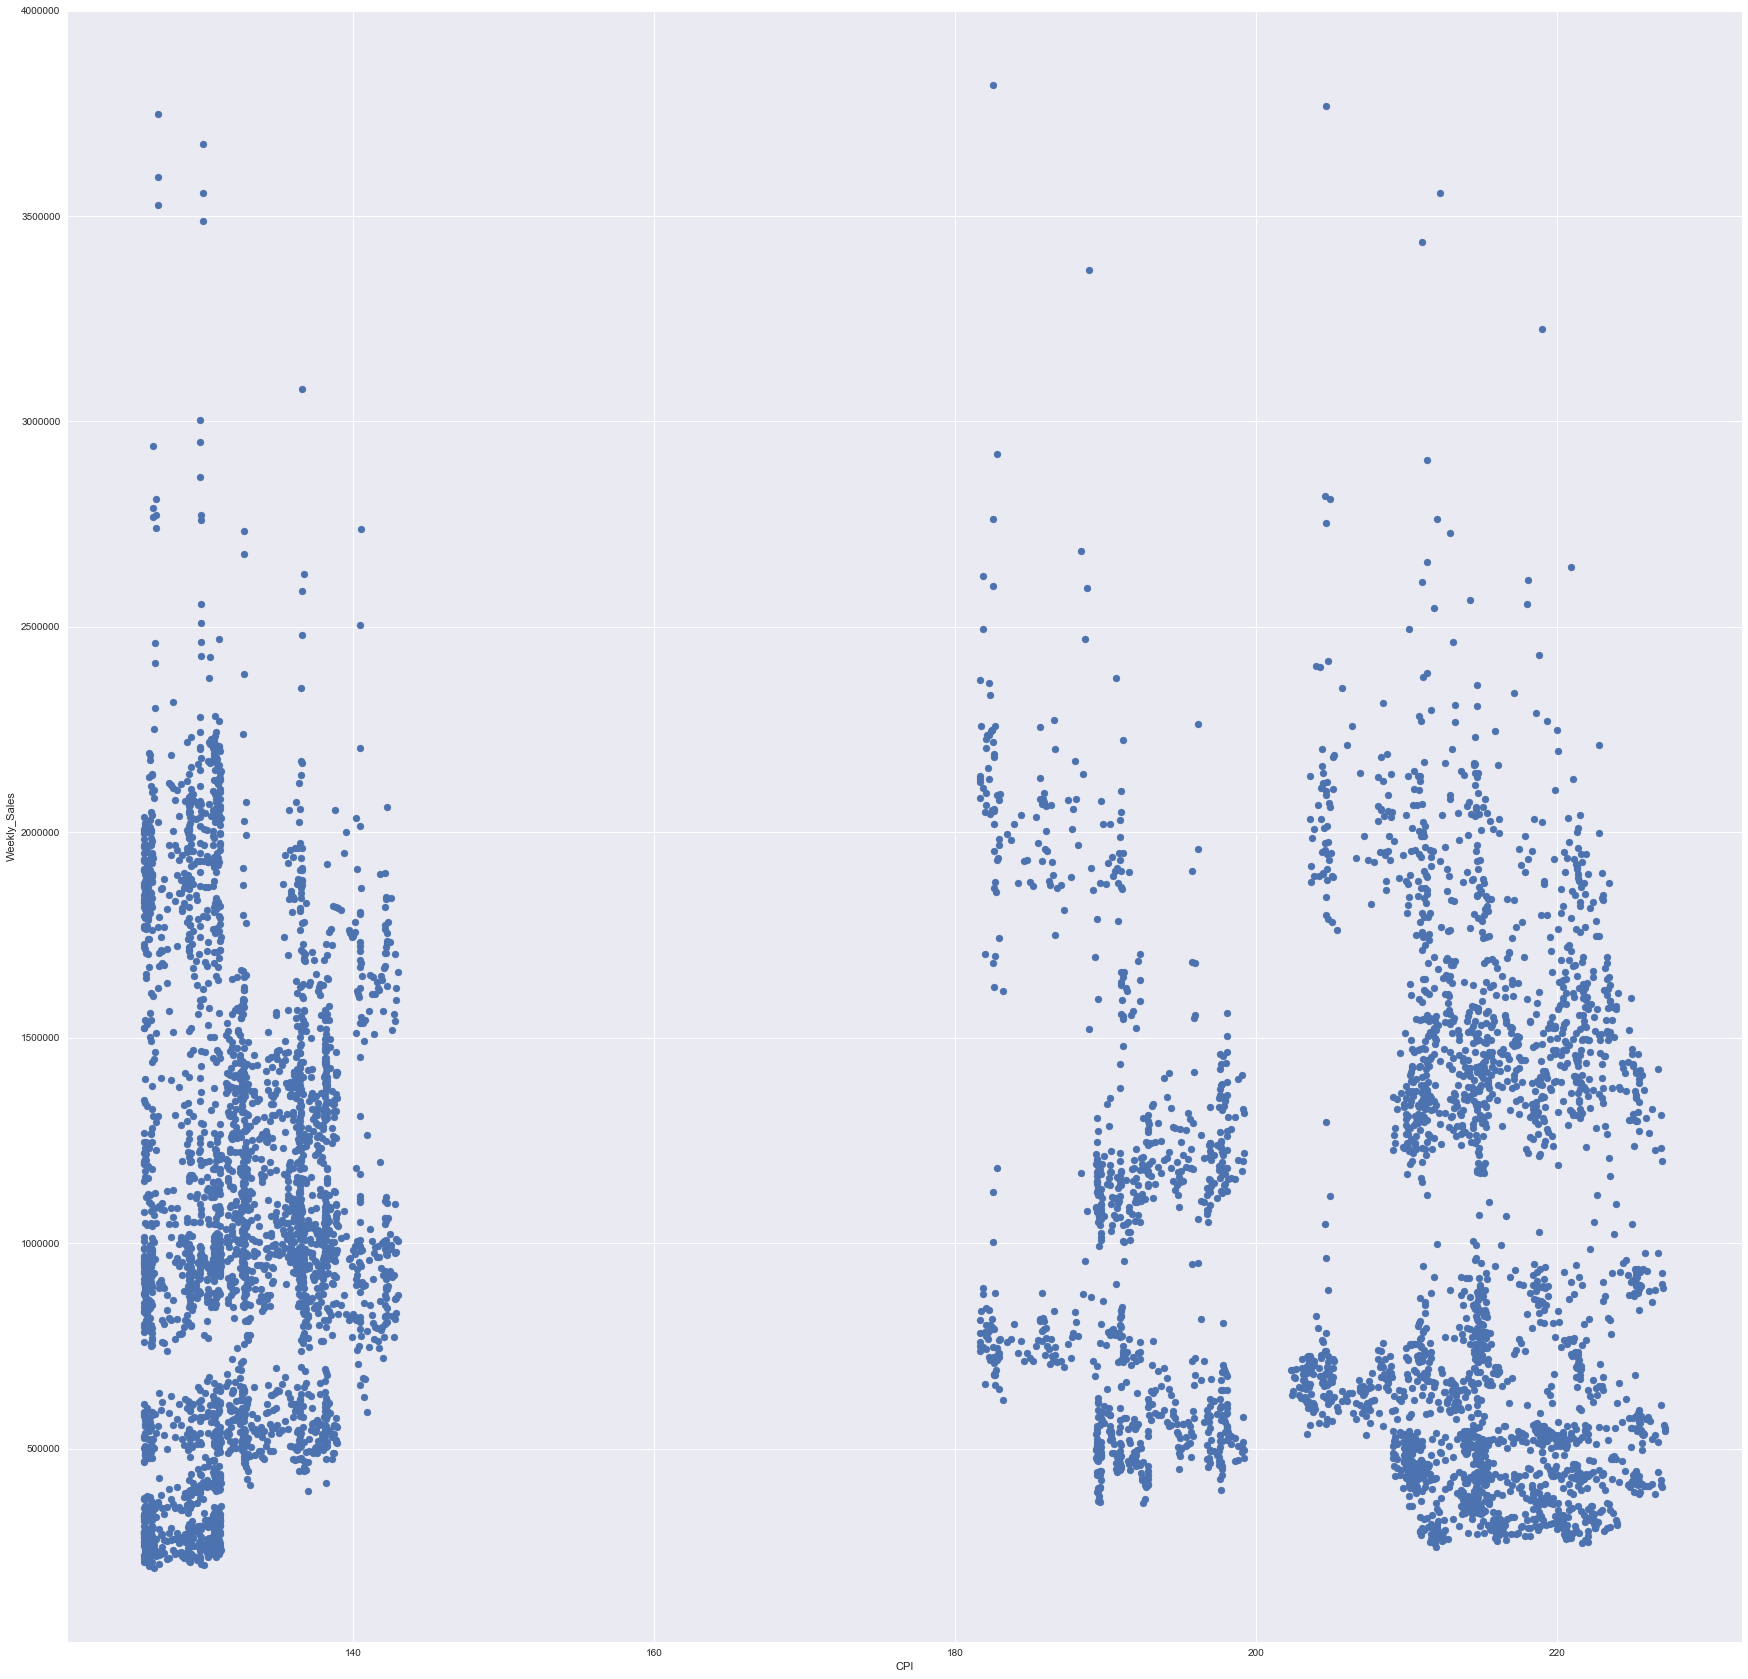

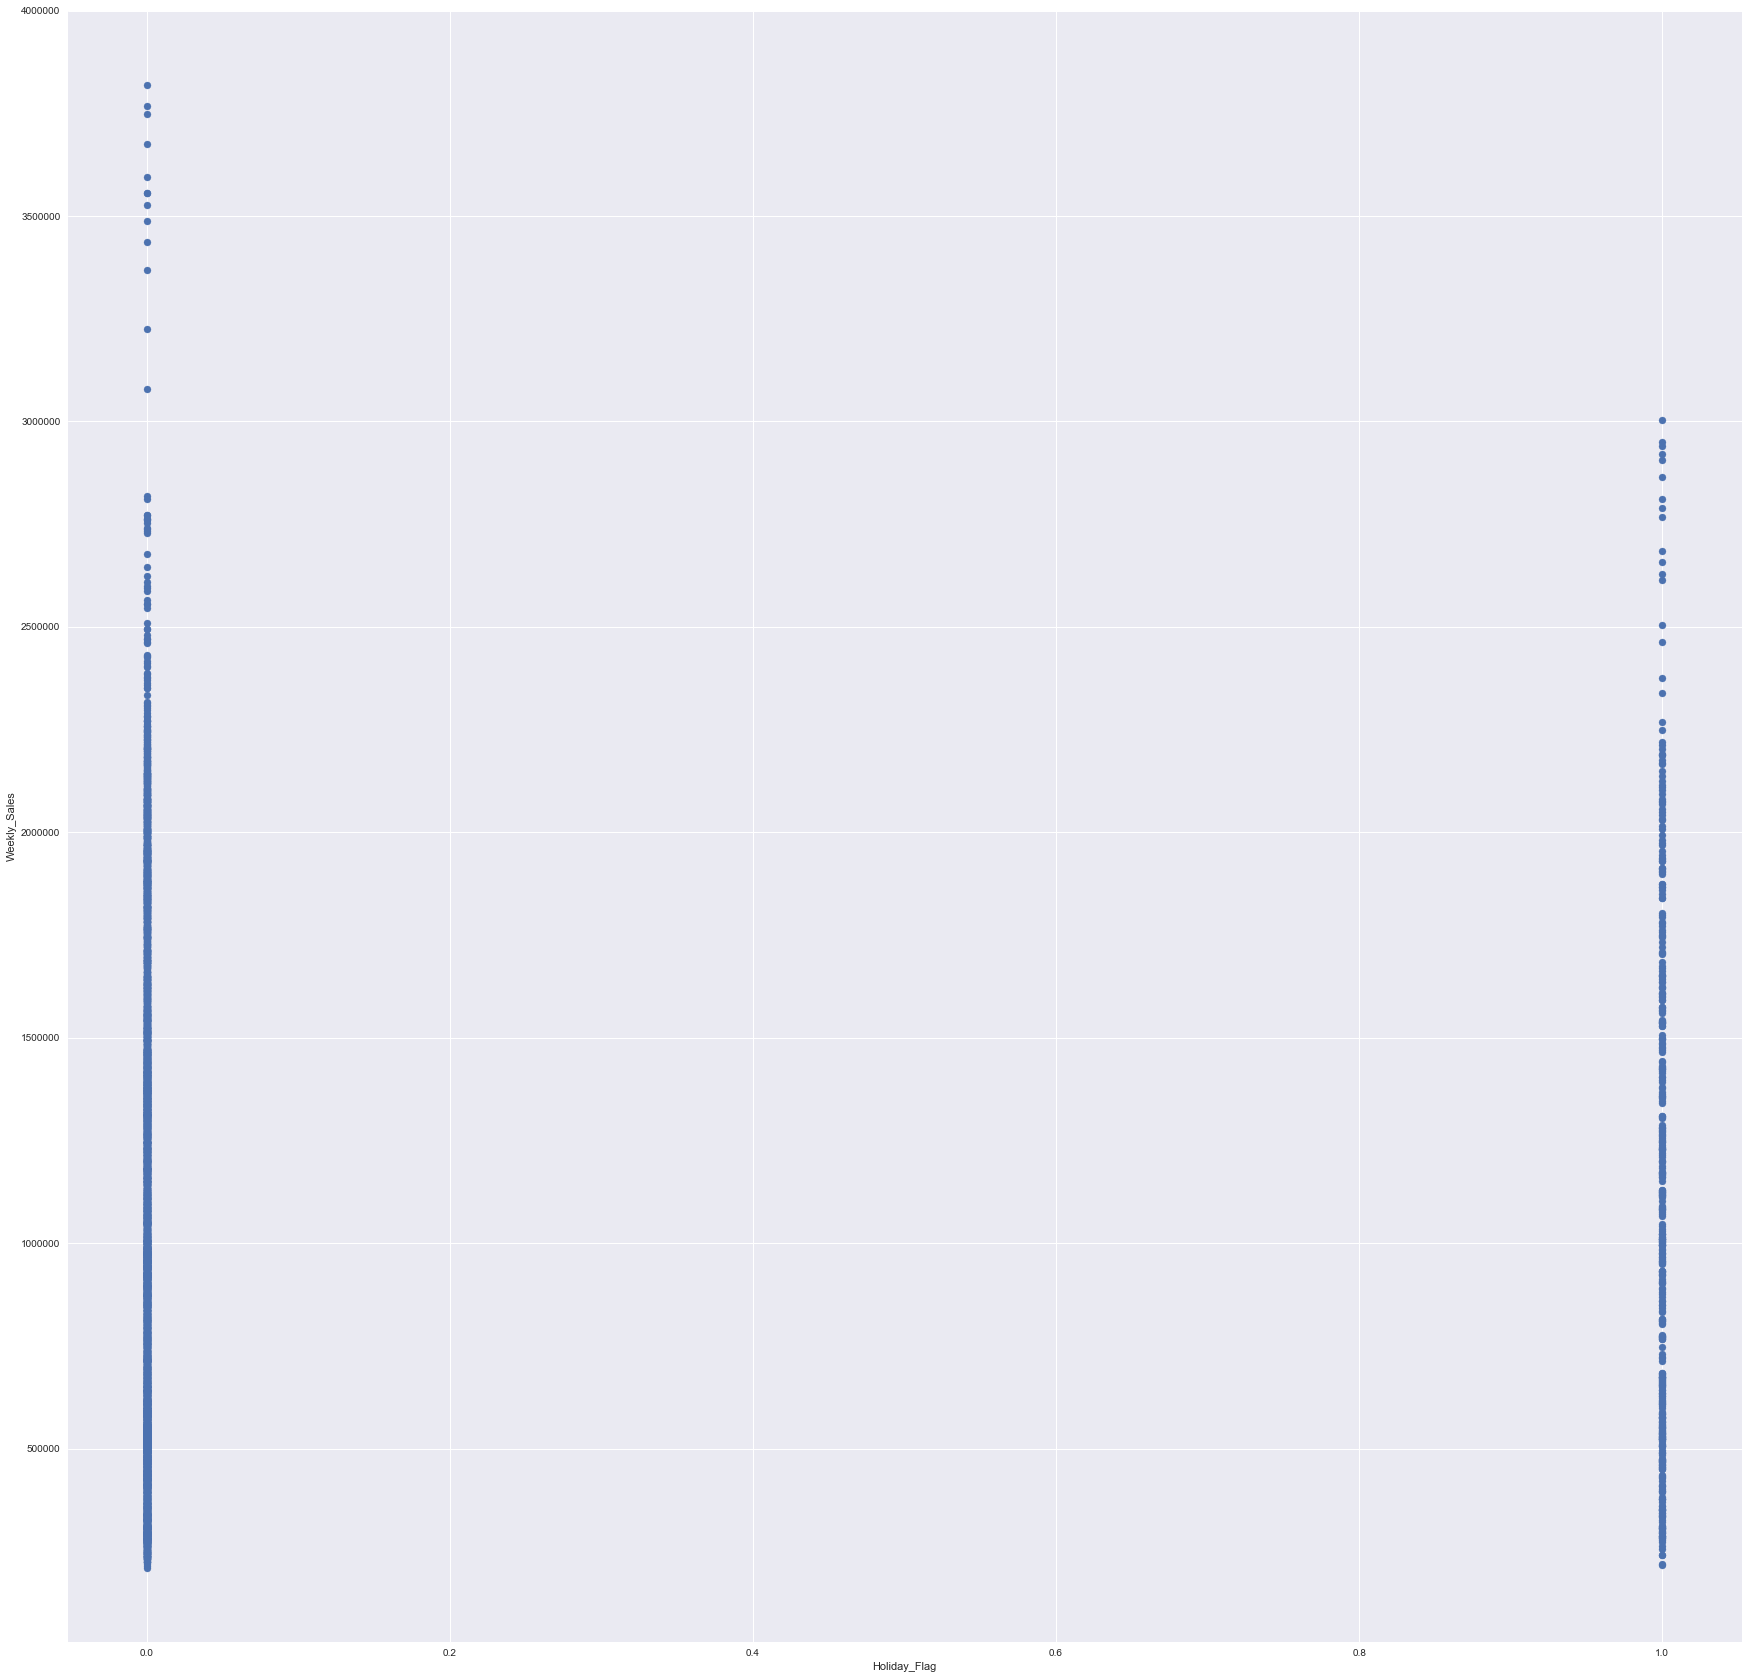

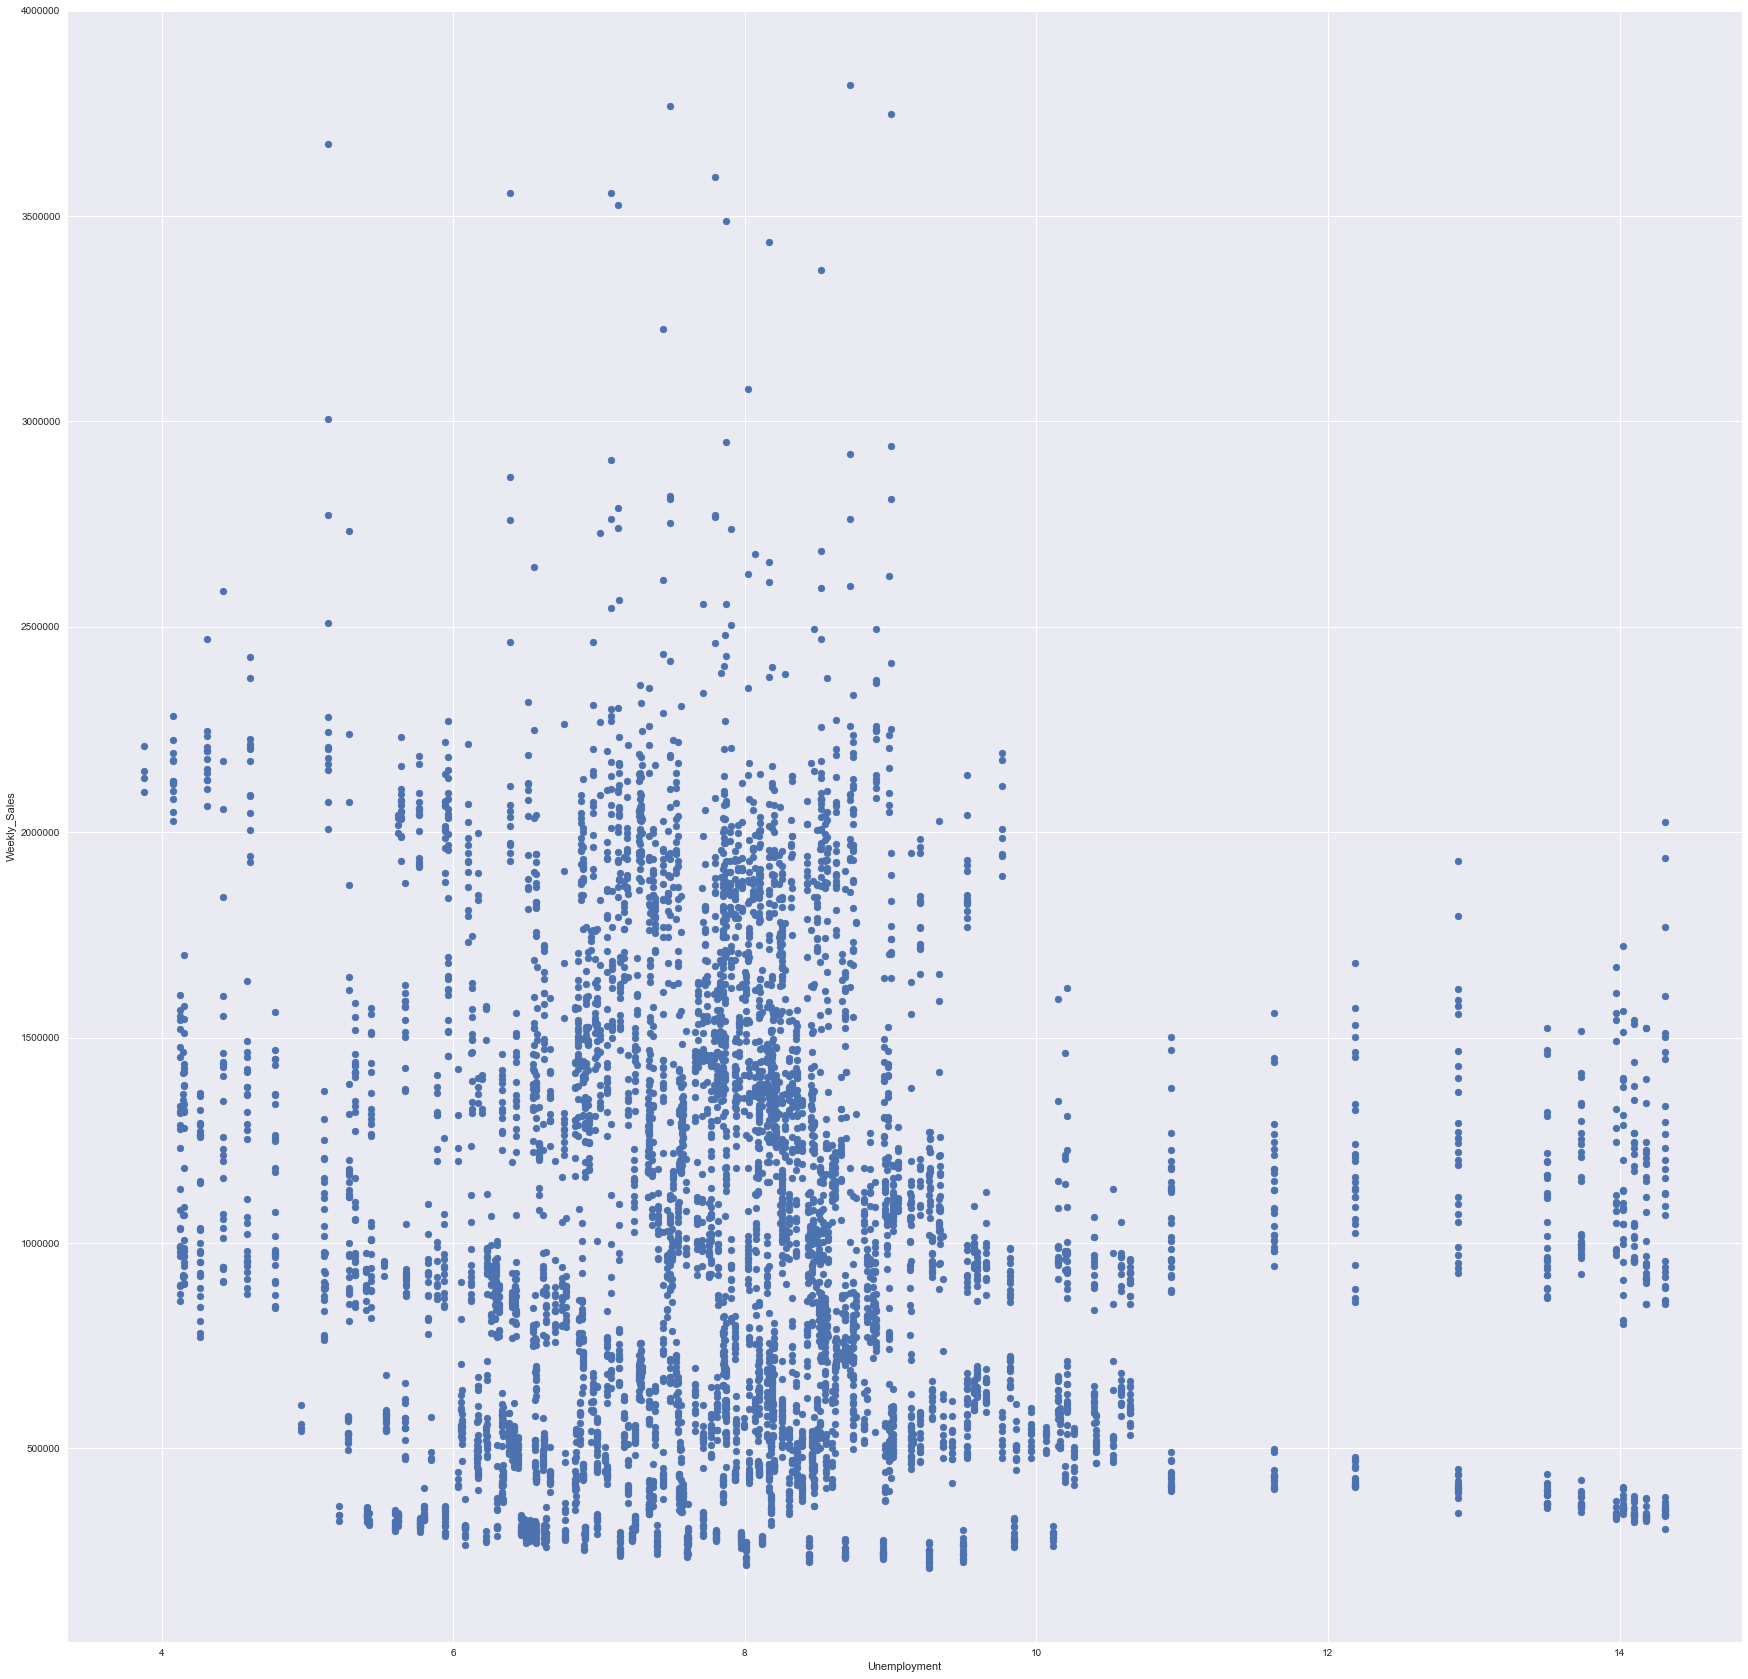

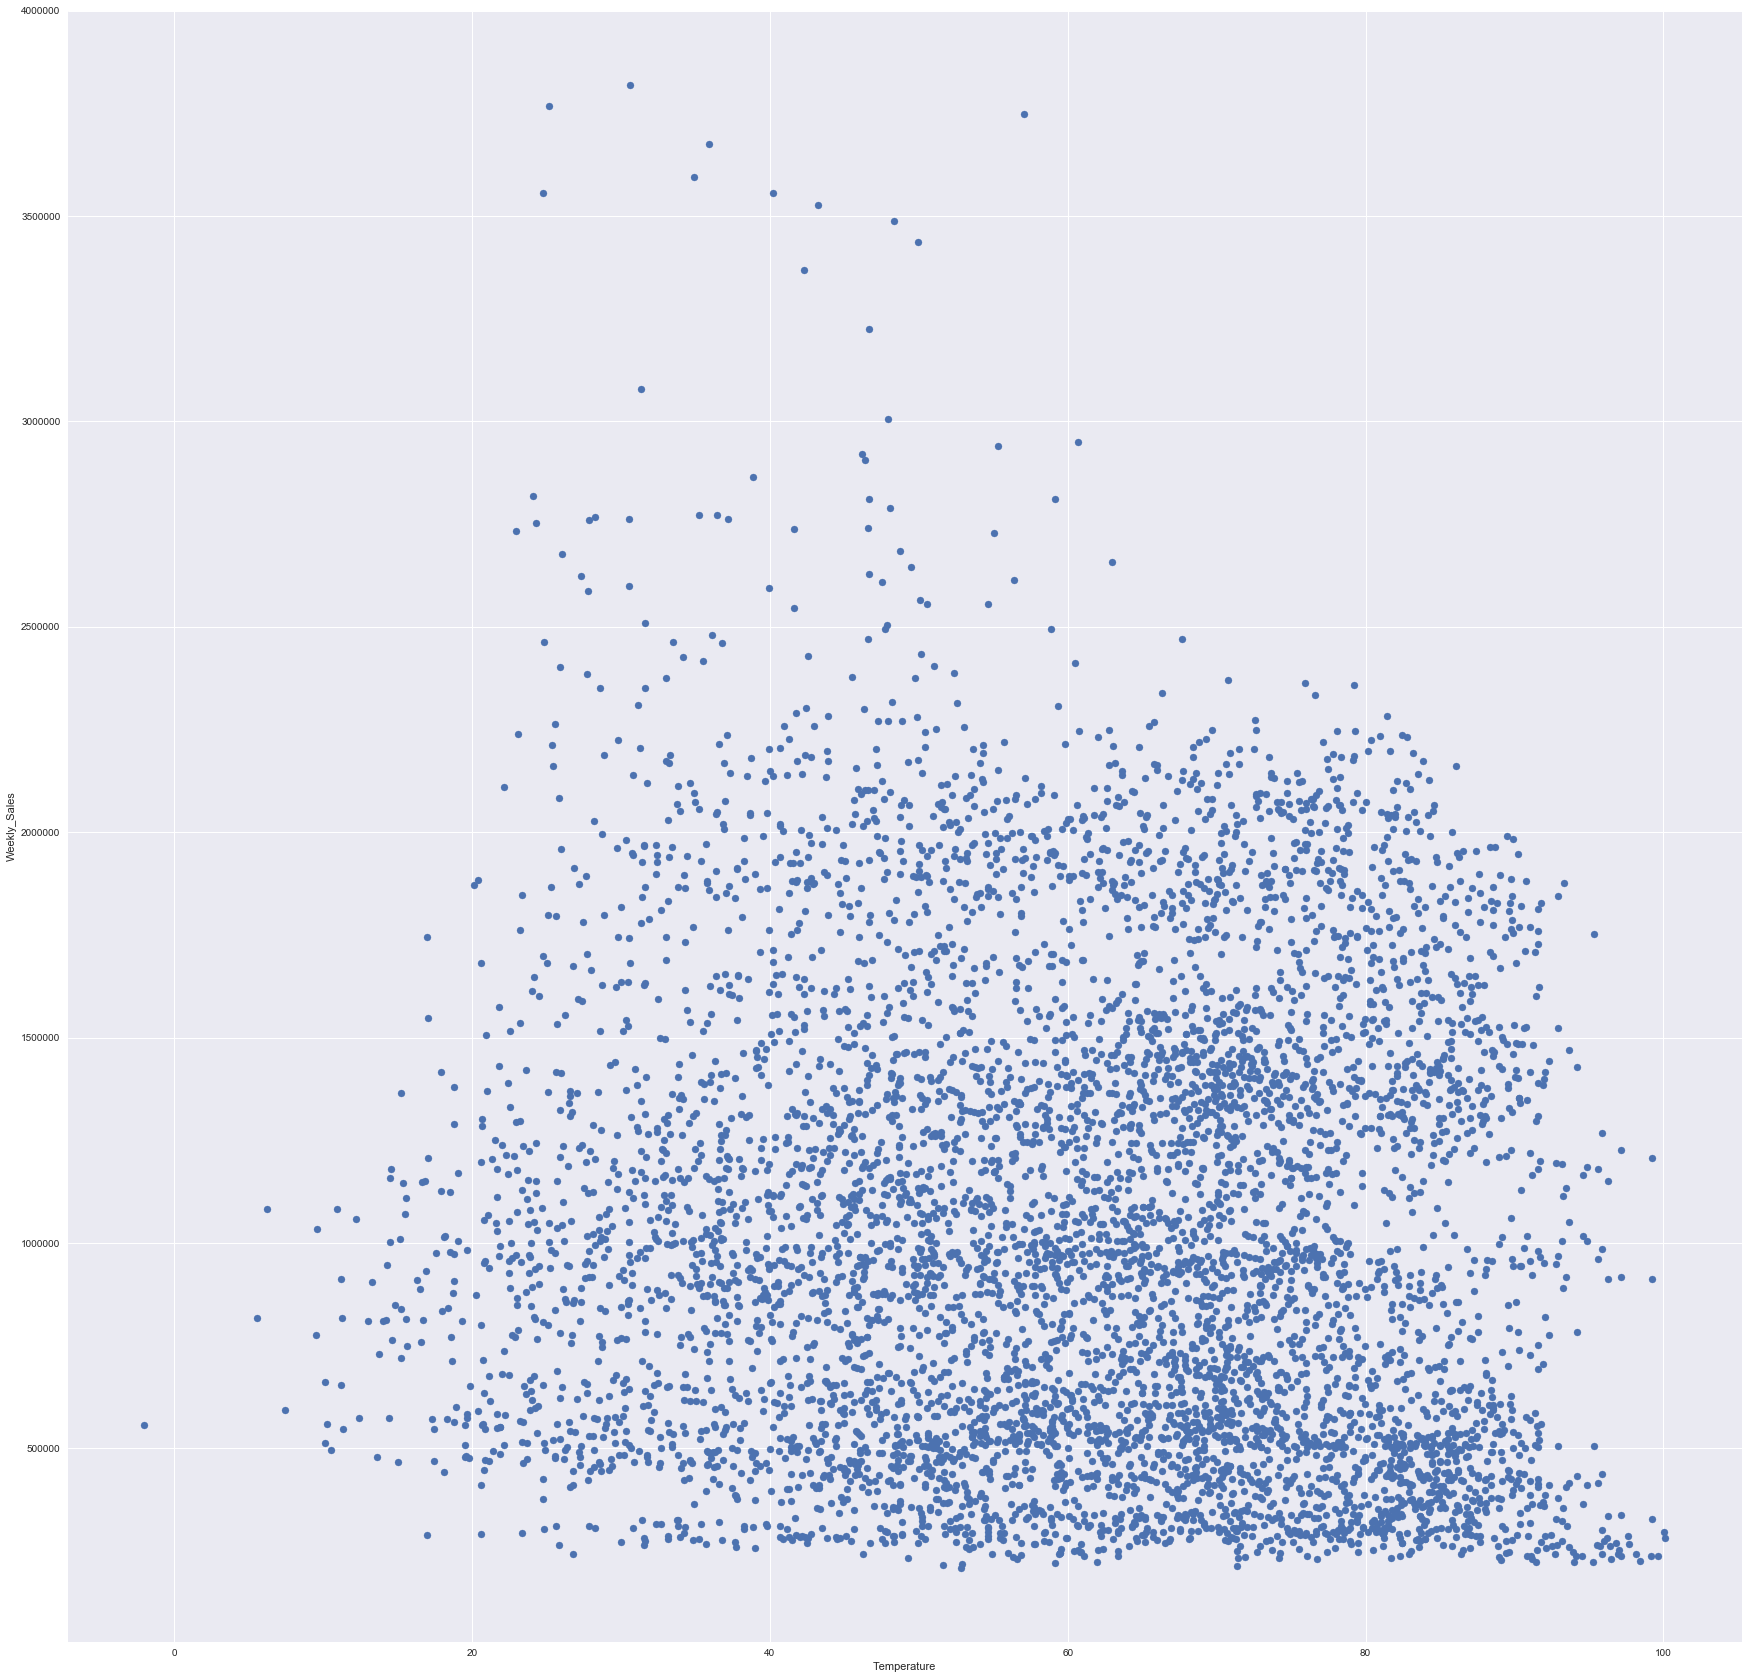

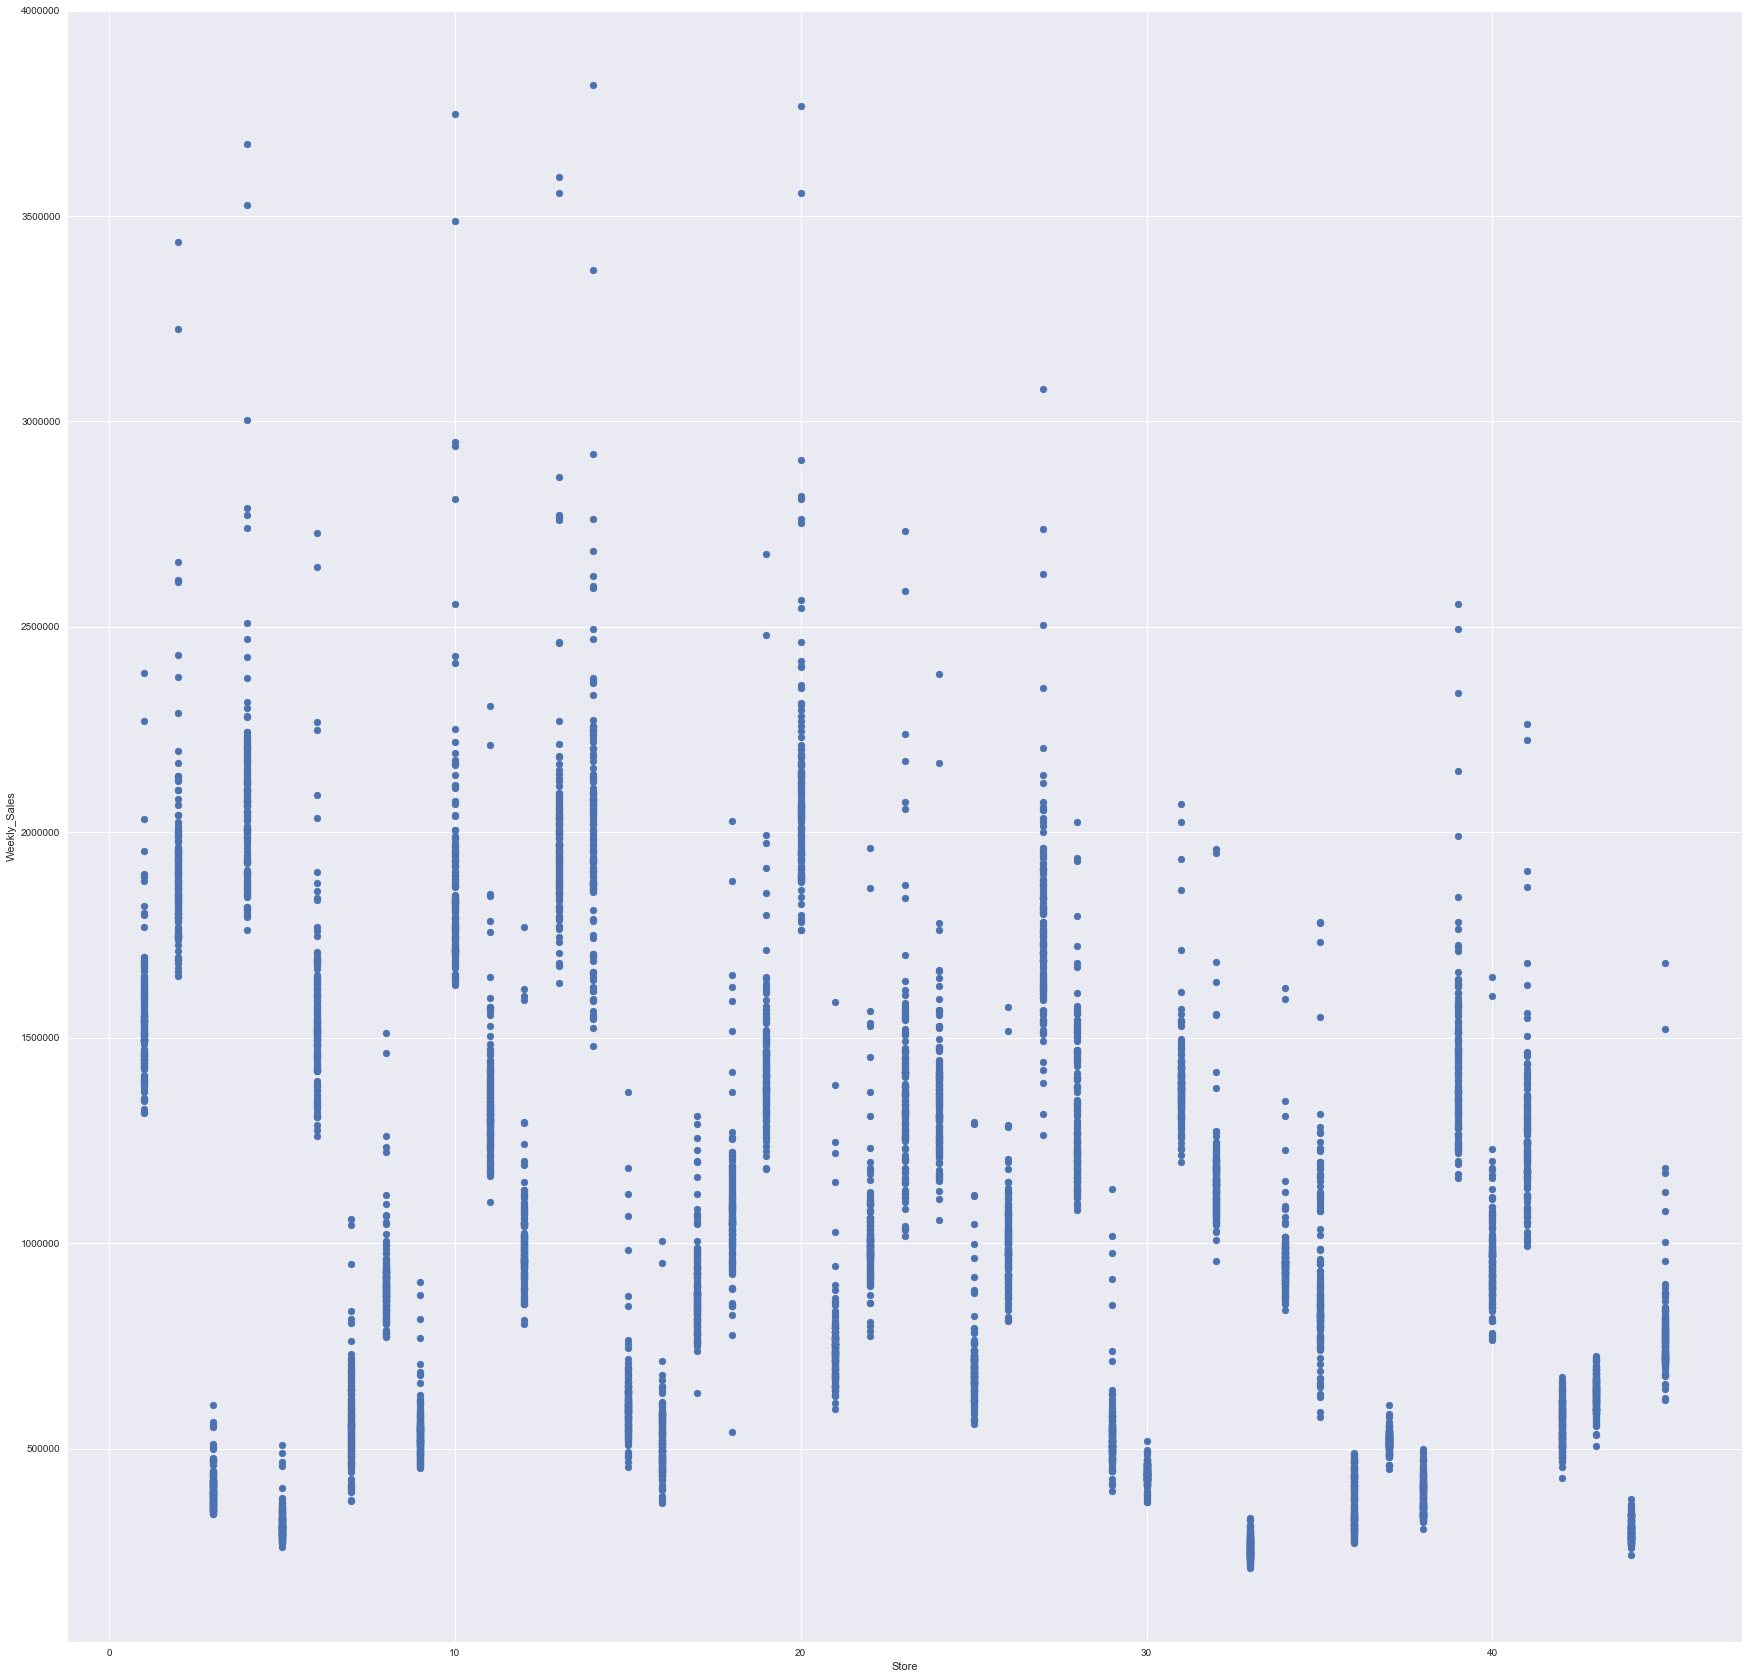

In [421]:
def scatter(df, column):
    plt.figure()
    plt.scatter(df[column] , df['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)
    
scatter(df, 'Fuel_Price')
scatter(df, 'CPI')
scatter(df, 'Holiday_Flag')
scatter(df, 'Unemployment')
scatter(df, 'Temperature')
scatter(df, 'Store')


Observing the above comparison for Store 1
Non holidays accounted for more sales than holidays

The temperature has bit of correlation in weekly sales, the band 20 - 60 has recorded more sales than the other temperatures.
so we are considering temperature as a feature

The corelation of Fuel price, CPI, Unemployment doesn't make sense with the Weekly Sales

In [422]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Day', 'Month', 'Qtr',
       'Semester'],
      dtype='object')

In [423]:
#adding the effect of temperature to the features
temp_bins = [0, 20, 60, 100]
temp_range = ['T1', 'T2', 'T3']
df['Temperature_Range'] = pd.cut(df.Temperature, temp_bins, labels = temp_range)
df = pd.get_dummies(df, columns=['Temperature_Range'])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Day,Month,Qtr,Semester,Temperature_Range_T1,Temperature_Range_T2,Temperature_Range_T3
0,1,2010-02-05,1643690,0,42.31,2.572,211.096358,8.106,2010,5,2,1,1,0,1,0
1,1,2010-02-12,1641957,1,38.51,2.548,211.242170,8.106,2010,12,2,1,1,0,1,0
2,1,2010-02-19,1611968,0,39.93,2.514,211.289143,8.106,2010,19,2,1,1,0,1,0
3,1,2010-02-26,1409727,0,46.63,2.561,211.319643,8.106,2010,26,2,1,1,0,1,0
4,1,2010-03-05,1554806,0,46.50,2.625,211.350143,8.106,2010,5,3,1,1,0,1,0
5,1,2010-03-12,1439541,0,57.79,2.667,211.380643,8.106,2010,12,3,1,1,0,1,0
6,1,2010-03-19,1472515,0,54.58,2.720,211.215635,8.106,2010,19,3,1,1,0,1,0
7,1,2010-03-26,1404429,0,51.45,2.732,211.018042,8.106,2010,26,3,1,1,0,1,0
8,1,2010-04-02,1594968,0,62.27,2.719,210.820450,7.808,2010,2,4,2,1,0,0,1
9,1,2010-04-09,1545418,0,65.86,2.770,210.622857,7.808,2010,9,4,2,1,0,0,1


In [426]:
#Loading test and train data set
# X = df[['Temperature','Fuel_Price','CPI','Unemployment', 'Holiday_Flag', 'Year', 'Day']]
#df = df[df['Store']==1]
df = df[df['Store']==1]

X = df[['Holiday_Flag', 'Year', 'Day', 'Month', 'Holiday_Flag','Temperature_Range_T2', 'Temperature_Range_T3']]
Y = df['Weekly_Sales']

X_train,X_test,Y_train,Y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

    

In [427]:
rfr = RandomForestRegressor(n_estimators = 250, random_state=0)  
#RandomForestRegressor

rfr.fit(X_train,Y_train)

Y_pred=rfr.predict(X_test)

In [436]:
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
accuracy = rfr.score(X_test,Y_test)
print('accuracy RandomForestRegressor: ',accuracy*100,'%')

55689.6104828
6267666171.46
79168.5933402
accuracy RandomForestRegressor:  74.0867982752 %


In [435]:
lr = LinearRegression()
dt= DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators = 100)
models = [lr,dt,rf]

for model in models:
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print(r2_score(Y_test,y_pred))

0.196480925453
0.534362462512
0.708892660172
